In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [18]:
from sklearn.datasets import fetch_20newsgroups

In [19]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('header','footers','quotes'))
documents = dataset.data
len(documents)

11314

11314

In [20]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [21]:
news_df = pd.DataFrame({'document':documents})
 
# removing everything except alphabets
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")
 
# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
 
# make all the lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

# remove stop-words

In [22]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
 
# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
 
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
 
# de-tokenization

detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer = TfidfVectorizer(stop_words='english', 
max_features =1000, # keep top 1000 terms
max_df = 0.5,
smooth_idf = True)
 
X = vectorizer.fit_transform(news_df['clean_doc'])
 

X.shape  # check shape of the document-term matrix


(11314, 1000)

(11314, 1000)

Existing work

In [24]:
#svd decomposition
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=40, algorithm='randomized', n_iter=100, random_state=122)
 
svd_model.fit(X)
#nmf decomposition
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=40, init='random', random_state=122)
 
nmf_model.fit(X)


NMF(init='random', n_components=40, random_state=122)

NMF(init='random', n_components=40, random_state=122)

Our contribution

In [25]:
#pca decomposition
from sklearn.decomposition import PCA

pca_model = PCA(n_components=40)
X_dense = X.todense() 
pca_model.fit(X_dense)

PCA(n_components=40)

PCA(n_components=40)

## Topics of each decomposition

In [26]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(pca_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end = " ")
    print()

Topic 0: 
nntp host posting university distribution reply world 
Topic 1: 
windows card file thanks drive files video 
Topic 2: 
university state pitt virginia ohio gordon banks 
Topic 3: 
pitt gordon banks science pittsburgh nasa computer 
Topic 4: 
pitt cwru cleveland gordon banks windows freenet 
Topic 5: 
cleveland cwru access nasa freenet reserve western 
Topic 6: 
state ohio university people clipper pitt chip 
Topic 7: 
nasa space windows state center research news 
Topic 8: 
drive sale scsi nasa state hard ohio 
Topic 9: 
distribution world virginia reply sale jesus drive 
Topic 10: 
clipper chip encryption netcom escrow technology keys 
Topic 11: 
distribution world reply windows team game cleveland 
Topic 12: 
caltech sale institute state technology keith ohio 
Topic 13: 
netcom services college communication jesus online columbia 
Topic 14: 
virginia sale like mail bike card good 
Topic 15: 
virginia netcom windows drive state ohio scsi 
Topic 16: 
netcom services distributi

In [27]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end = " ")
    print()

Topic 0: 
posting host nntp university distribution like reply 
Topic 1: 
nntp host posting university distribution reply cwru 
Topic 2: 
windows card file thanks drive help files 
Topic 3: 
university state ohio cleveland virginia pitt cwru 
Topic 4: 
pitt gordon banks computer science pittsburgh reply 
Topic 5: 
cleveland cwru freenet reserve western case pitt 
Topic 6: 
nasa state access ohio space cleveland distribution 
Topic 7: 
nasa space cleveland cwru team game freenet 
Topic 8: 
access sale drive digex game team netcom 
Topic 9: 
access windows digex virginia unix team public 
Topic 10: 
distribution world virginia reply jesus sale drive 
Topic 11: 
clipper chip distribution reply encryption netcom escrow 
Topic 12: 
virginia university space drive clipper chip uiuc 
Topic 13: 
caltech institute sale technology keith california virginia 
Topic 14: 
netcom sale services college mail jesus communication 
Topic 15: 
netcom uiuc university illinois services caltech article 
Topic

In [28]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(nmf_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end = " ")
    print()

Topic 0: 
like know sounds looks doesn look sure 
Topic 1: 
help need graphics package line appreciated program 
Topic 2: 
card video monitor drivers cards driver color 
Topic 3: 
sale offer condition price shipping sell asking 
Topic 4: 
michael mike programs smith institute tell include 
Topic 5: 
caltech institute technology keith california atheists political 
Topic 6: 
reply message david south corporation john news 
Topic 7: 
andrew pittsburgh engineering robert school cwru scott 
Topic 8: 
unix public access math dept paul world 
Topic 9: 
distribution world keywords systems news computing thomas 
Topic 10: 
jesus christian bible christians christ believe church 
Topic 11: 
posting nntp host university research keywords john 
Topic 12: 
university uiuc illinois news chicago computing article 
Topic 13: 
utexas austin texas news uucp mail originator 
Topic 14: 
mail thanks info looking advance information list 
Topic 15: 
version newsreader national group robert source driver 
To

## Visualization

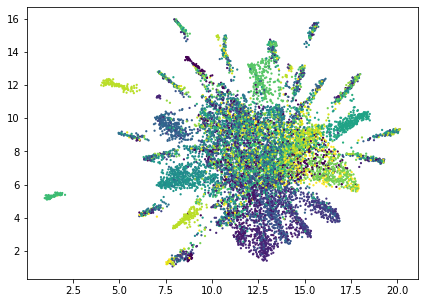

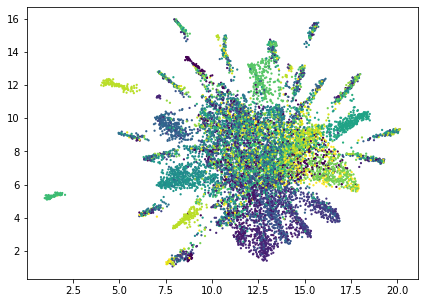

In [29]:
import umap.umap_ as umap
 
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],

c = dataset.target,
s = 5, # size
edgecolor='none'

)
plt.show()

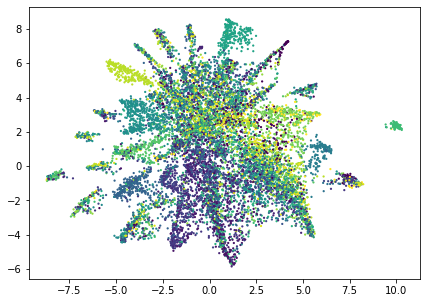

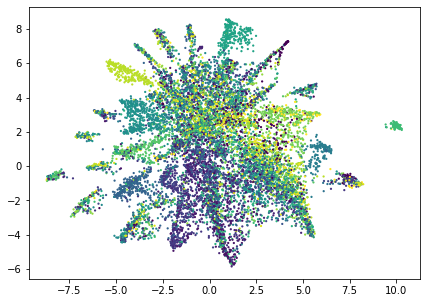

In [30]:
import umap.umap_ as umap
 
X_topics = nmf_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],

c = dataset.target,
s = 5, # size
edgecolor='none'

)
plt.show()

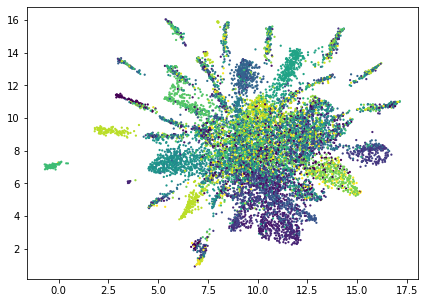

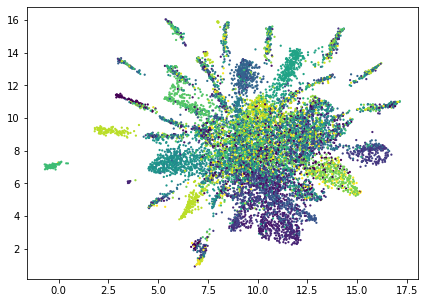

In [32]:
import umap.umap_ as umap
 
X_topics = pca_model.fit_transform(X_dense)
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],

c = dataset.target,
s = 5, # size
edgecolor='none'

)
plt.show()

In [33]:
from numpy.linalg import norm
def similar(a,b):
    aa = a/(norm(a)+0.00001)
    bb = b/(norm(b)+0.00001)
    return aa*np.transpose(bb)

In [36]:
mat_X = np.mat(X_dense)

In [37]:
from sklearn.decomposition import PCA
import time
X_dense = X.todense() 
pca_list = []
pca_time = []
for k in range(20,101,5):
    tic = time.time()
    pca_model = PCA(n_components=k)
    pca_model.fit(X_dense)
    pca_T = pca_model.fit_transform(X_dense)
    pca_Y = pca_model.components_

    pca_X = np.mat(pca_T)*np.mat(pca_Y)

    pca_similarity = 0
    pca_sum = 0
    for i in range(mat_X.shape[0]):
        pca_similarity =similar(mat_X[i,:],pca_X[i,:])[0,0]
        pca_sum = pca_sum + pca_similarity
    pca_list.append(pca_sum)
    toc = time.time()
    print(k,pca_sum,toc-tic)
    pca_time.append(toc-tic)



20 3306.3949138716134 1.3330001831054688
20 3306.3949138716134 1.3330001831054688
25 3618.3504251691143 1.2659997940063477
25 3618.3504251691143 1.2659997940063477
30 3882.684838271641 1.2820000648498535
30 3882.684838271641 1.2820000648498535
35 4121.233220525621 1.3289999961853027
35 4121.233220525621 1.3289999961853027
40 4331.2905497163365 1.4039998054504395
40 4331.2905497163365 1.4039998054504395
45 4537.725272935148 1.5199999809265137
45 4537.725272935148 1.5199999809265137
50 4723.955623911287 1.5329999923706055
50 4723.955623911287 1.5329999923706055
55 4895.8578966963905 1.6740002632141113
55 4895.8578966963905 1.6740002632141113
60 5063.893662789628 1.6379997730255127
60 5063.893662789628 1.6379997730255127
65 5212.991812525338 1.7380001544952393
65 5212.991812525338 1.7380001544952393
70 5355.0292382919815 1.7849998474121094
70 5355.0292382919815 1.7849998474121094
75 5491.797120678385 1.8469998836517334
75 5491.797120678385 1.8469998836517334
80 5618.952456337637 1.8940000

In [38]:
mat_X=np.mat(X.todense())
svd_list = []
svd_time = []
for k in range(20,101,5):
    tic = time.time()
    svd_model = TruncatedSVD(n_components=k, algorithm='randomized', n_iter=100, random_state=122)
    svd_model.fit(X)
    svd_T = svd_model.fit_transform(X)
    svd_Y = svd_model.components_
    
    svd_X = np.mat(svd_T)*np.mat(svd_Y)
    
    svd_similarity = 0
    svd_sum = 0

    for i in range(mat_X.shape[0]):
        svd_similarity =similar(mat_X[i,:],svd_X[i,:])[0,0]
        svd_sum = svd_sum + svd_similarity
    svd_list.append(svd_sum)
    toc = time.time()
    print(k,svd_sum,toc-tic)
    svd_time.append(toc-tic)

20 3823.558481951422 3.92900013923645
20 3823.558481951422 3.92900013923645
25 4112.8796289913425 4.609999895095825
25 4112.8796289913425 4.609999895095825
30 4349.459828095768 5.111999988555908
30 4349.459828095768 5.111999988555908
35 4561.85179388367 5.830000162124634
35 4561.85179388367 5.830000162124634
40 4759.337644217855 6.567000150680542
40 4759.337644217855 6.567000150680542
45 4944.123116457143 7.133999824523926
45 4944.123116457143 7.133999824523926
50 5114.396797985006 7.56600022315979
50 5114.396797985006 7.56600022315979
55 5279.002873492102 8.378999948501587
55 5279.002873492102 8.378999948501587
60 5431.619555111974 9.444000005722046
60 5431.619555111974 9.444000005722046
65 5576.1522777231685 10.289000034332275
65 5576.1522777231685 10.289000034332275
70 5709.902495289586 10.858000040054321
70 5709.902495289586 10.858000040054321
75 5837.320265279224 11.52299976348877
75 5837.320265279224 11.52299976348877
80 5956.014784488286 12.44700026512146
80 5956.014784488286 12

In [39]:

nmf_list = []
nmf_time = []
for k in range(20,101,5):
    tic = time.time()
    nmf_model = NMF(n_components=k, init='random', random_state=122)
    nmf_model.fit(X)
    nmf_T = nmf_model.fit_transform(X)
    nmf_Y = nmf_model.components_

    nmf_X = np.mat(nmf_T)*np.mat(nmf_Y)

    nmf_similarity = 0
    nmf_sum = 0
    for i in range(mat_X.shape[0]):
        nmf_similarity =similar(mat_X[i,:],nmf_X[i,:])[0,0]
        nmf_sum = nmf_sum + nmf_similarity
    nmf_list.append(nmf_sum)
    toc = time.time()
    print(k,nmf_sum,toc- tic)
    nmf_time.append(toc-tic)


20 3717.5818158784577 5.513000011444092
20 3717.5818158784577 5.513000011444092


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

25 3991.7252692903753 9.111000061035156
25 3991.7252692903753 9.111000061035156


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

30 4191.719112854311 11.318999767303467
30 4191.719112854311 11.318999767303467
35 4430.364211131653 12.516999959945679
35 4430.364211131653 12.516999959945679
40 4602.588257802594 11.966000080108643
40 4602.588257802594 11.966000080108643


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

45 4778.727955643334 20.49400019645691
45 4778.727955643334 20.49400019645691
50 4930.249941429189 13.144000053405762
50 4930.249941429189 13.144000053405762


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

55 5092.844402448717 28.551000118255615
55 5092.844402448717 28.551000118255615


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

60 5219.09892516668 32.054999589920044
60 5219.09892516668 32.054999589920044


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

65 5389.592692134872 37.930999755859375
65 5389.592692134872 37.930999755859375


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

70 5503.81187813659 43.90900015830994
70 5503.81187813659 43.90900015830994


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

75 5647.621904804511 48.7979998588562
75 5647.621904804511 48.7979998588562


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

80 5761.220168553174 53.57200002670288
80 5761.220168553174 53.57200002670288


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

85 5883.514789657785 61.22200012207031
85 5883.514789657785 61.22200012207031


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

90 5992.009600562145 70.39199995994568
90 5992.009600562145 70.39199995994568
95 6101.676941525308 70.0640001296997
95 6101.676941525308 70.0640001296997


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it 

100 6201.197578480416 81.65499997138977
100 6201.197578480416 81.65499997138977


In [40]:
svd_list

[3823.558481951422,
 4112.8796289913425,
 4349.459828095768,
 4561.85179388367,
 4759.337644217855,
 4944.123116457143,
 5114.396797985006,
 5279.002873492102,
 5431.619555111974,
 5576.1522777231685,
 5709.902495289586,
 5837.320265279224,
 5956.014784488286,
 6071.597321733165,
 6180.169332401579,
 6284.86614576847,
 6385.165060885633]

[3823.558481951422,
 4112.8796289913425,
 4349.459828095768,
 4561.85179388367,
 4759.337644217855,
 4944.123116457143,
 5114.396797985006,
 5279.002873492102,
 5431.619555111974,
 5576.1522777231685,
 5709.902495289586,
 5837.320265279224,
 5956.014784488286,
 6071.597321733165,
 6180.169332401579,
 6284.86614576847,
 6385.165060885633]

In [41]:
nmf_list

[3717.5818158784577,
 3991.7252692903753,
 4191.719112854311,
 4430.364211131653,
 4602.588257802594,
 4778.727955643334,
 4930.249941429189,
 5092.844402448717,
 5219.09892516668,
 5389.592692134872,
 5503.81187813659,
 5647.621904804511,
 5761.220168553174,
 5883.514789657785,
 5992.009600562145,
 6101.676941525308,
 6201.197578480416]

[3717.5818158784577,
 3991.7252692903753,
 4191.719112854311,
 4430.364211131653,
 4602.588257802594,
 4778.727955643334,
 4930.249941429189,
 5092.844402448717,
 5219.09892516668,
 5389.592692134872,
 5503.81187813659,
 5647.621904804511,
 5761.220168553174,
 5883.514789657785,
 5992.009600562145,
 6101.676941525308,
 6201.197578480416]

In [42]:
pca_list

[3306.3949138716134,
 3618.3504251691143,
 3882.684838271641,
 4121.233220525621,
 4331.2905497163365,
 4537.725272935148,
 4723.955623911287,
 4895.8578966963905,
 5063.893662789628,
 5212.991812525338,
 5355.0292382919815,
 5491.797120678385,
 5618.952456337637,
 5739.573915050277,
 5853.796579913112,
 5965.604249626544,
 6039.331220838801]

[3306.3949138716134,
 3618.3504251691143,
 3882.684838271641,
 4121.233220525621,
 4331.2905497163365,
 4537.725272935148,
 4723.955623911287,
 4895.8578966963905,
 5063.893662789628,
 5212.991812525338,
 5355.0292382919815,
 5491.797120678385,
 5618.952456337637,
 5739.573915050277,
 5853.796579913112,
 5965.604249626544,
 6039.331220838801]

In [43]:
svd_time

[3.92900013923645,
 4.609999895095825,
 5.111999988555908,
 5.830000162124634,
 6.567000150680542,
 7.133999824523926,
 7.56600022315979,
 8.378999948501587,
 9.444000005722046,
 10.289000034332275,
 10.858000040054321,
 11.52299976348877,
 12.44700026512146,
 13.242000102996826,
 12.90499997138977,
 14.129999876022339,
 14.909000158309937]

[3.92900013923645,
 4.609999895095825,
 5.111999988555908,
 5.830000162124634,
 6.567000150680542,
 7.133999824523926,
 7.56600022315979,
 8.378999948501587,
 9.444000005722046,
 10.289000034332275,
 10.858000040054321,
 11.52299976348877,
 12.44700026512146,
 13.242000102996826,
 12.90499997138977,
 14.129999876022339,
 14.909000158309937]

In [44]:
pca_time

[1.3330001831054688,
 1.2659997940063477,
 1.2820000648498535,
 1.3289999961853027,
 1.4039998054504395,
 1.5199999809265137,
 1.5329999923706055,
 1.6740002632141113,
 1.6379997730255127,
 1.7380001544952393,
 1.7849998474121094,
 1.8469998836517334,
 1.8940000534057617,
 2.0329999923706055,
 2.074000120162964,
 2.113999843597412,
 1.696000099182129]

[1.3330001831054688,
 1.2659997940063477,
 1.2820000648498535,
 1.3289999961853027,
 1.4039998054504395,
 1.5199999809265137,
 1.5329999923706055,
 1.6740002632141113,
 1.6379997730255127,
 1.7380001544952393,
 1.7849998474121094,
 1.8469998836517334,
 1.8940000534057617,
 2.0329999923706055,
 2.074000120162964,
 2.113999843597412,
 1.696000099182129]

In [45]:
nmf_time

[5.513000011444092,
 9.111000061035156,
 11.318999767303467,
 12.516999959945679,
 11.966000080108643,
 20.49400019645691,
 13.144000053405762,
 28.551000118255615,
 32.054999589920044,
 37.930999755859375,
 43.90900015830994,
 48.7979998588562,
 53.57200002670288,
 61.22200012207031,
 70.39199995994568,
 70.0640001296997,
 81.65499997138977]

[5.513000011444092,
 9.111000061035156,
 11.318999767303467,
 12.516999959945679,
 11.966000080108643,
 20.49400019645691,
 13.144000053405762,
 28.551000118255615,
 32.054999589920044,
 37.930999755859375,
 43.90900015830994,
 48.7979998588562,
 53.57200002670288,
 61.22200012207031,
 70.39199995994568,
 70.0640001296997,
 81.65499997138977]